In [51]:
import pandas as pd 
df_test = pd.read_csv("C:/Users/chahd/Desktop/projet_Data_mining/test.csv")
df_train = pd.read_csv("C:/Users/chahd/Desktop/projet_Data_mining/train.csv")

## Chargement des données
Dans cette cellule, nous importons la bibliothèque **pandas** et nous chargeons les jeux de données **d'entraînement** et **de test** à partir des fichiers CSV stockés localement.

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Aperçu du jeu de données d'entraînement

Dans cette cellule, nous affichons les **5 premières lignes** du jeu de données d'entraînement df_train` à l'aide de la fonction `head()`.  
Cela permet d'obtenir un premier aperçu des variables disponibles et de leur format.

Ce dataset est issu du célèbre naufrage du **RMS Titanic**, survenu lors de son voyage inaugural en avril 1912.  
Le Titanic a heurté un iceberg et a coulé, entraînant la mort de **1502 personnes** sur **2224 passagers** et membres d'équipage.  
Ce drame a profondément marqué l'histoire et a entraîné d'importantes réformes en matière de sécurité maritime.

Le dataset propose des informations sur un échantillon de passagers du Titanic, notamment des données **personnelles** et **socio-économiques**.  
L'objectif est d'utiliser ces informations pour **prédire la probabilité de survie** d'un passager en fonction de certaines caractéristiques.

## Caractéristiques du dataset

- **PassengerId** : Identifiant unique du passager.
- **Survived** : Indicateur de survie (0 = Non, 1 = Oui).
- **Pclass** : Classe du billet (1ère, 2ème, ou 3ème classe).
- **Name** : Nom complet du passager.
- **Sex** : Sexe du passager.
- **Age** : Âge du passager.
- **SibSp** : Nombre de frères/sœurs et conjoints à bord.
- **Parch** : Nombre de parents et enfants à bord.
- **Ticket** : Numéro du billet.
- **Fare** : Tarif payé pour le billet.
- **Cabin** (parfois manquant).
- **Embarked** : Port d'embarquement (C = Cherbourg, Q = Queenstow, S = Southampton).



In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Informations générales sur le jeu de données d'entraînement

Dans cette cellule, nous utilisons la méthode `info()` pour afficher des informations générales sur le DataFrame `df_train`, notamment :

- Le nombre total de lignes et de colonnes,
- Les noms des colonnes,
- Le nombre de valeurs non nulles par colonne,
- Le type de données de chaque colonne (int, float, object, etc.).

Cette étape permet d'avoir une première idée sur la structure des données et d'identifier rapidement la présence de valeurs manquantes.

In [60]:
nan_percentage = df_test.isna().mean() * 100
print(nan_percentage)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


## Pourcentage de valeurs manquantes dans le jeu de données de test

Dans cette cellule, nous calculons le **pourcentage de valeurs manquantes** pour chaque colonne du DataFrame `df_test`.  
La méthode utilisée est :

- `isna()` : détecte les valeurs manquantes,
- `mean()` : calcule la proportion de valeurs manquantes,
- Multiplication par 100 pour obtenir un pourcentage.

Cela permet d'identifier rapidement quelles colonnes nécessitent un traitement spécifique pour la gestion des données manquantes.

In [63]:
df_test.drop("Cabin", axis=1, inplace=True)

## Suppression de la colonne "Cabin"

La colonne **Cabin** contient environ **78 % de valeurs manquantes**, ce qui est très élevé.  
Plutôt que d'essayer de la compléter ou de l'utiliser, nous choisissons de **supprimer** cette colonne du jeu de données `df_test` afin de simplifier l'analyse et d'améliorer la qualité du modèle.

La suppression est réalisée avec la méthode `drop()` en spécifiant :
- `"Cabin"` comme colonne à supprimer,
- `axis=1` pour indiquer qu'on travaille sur les colonnes (et non les lignes),
- `inplace=True` pour modifier directement `df_test` sans créer une nouvelle copie.

In [66]:
average_age = df_test.groupby(['Pclass', 'Sex'])['Age'].mean()
print(average_age)

Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64


## Calcul de l'âge moyen par classe et par sexe

Dans cette cellule, nous calculons l'**âge moyen** des passagers en fonction de leur **classe (`Pclass`)** et de leur **sexe (`Sex`)** dans le jeu de données `df_test`.

La méthode utilisée est :
- `groupby(['Pclass', 'Sex'])` : regroupe les données selon la classe et le sexe,
- `['Age'].mean()` : calcule la moyenne des âges pour chaque groupe.

Ce calcul est utile notamment pour **imputer** les âges manquants de manière plus précise en fonction du profil du passager (classe + sexe).


In [69]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average_age.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df_test['Age'] = df_test.apply(fill_age, axis=1)


## Remplissage des âges manquants

Dans cette cellule, nous créons une fonction `fill_age(row)` qui permet de **remplacer les valeurs manquantes** dans la colonne `Age` :

- Si l'âge est manquant (`NaN`), la fonction attribue l'**âge moyen** correspondant à la **classe** (`Pclass`) et au **sexe** (`Sex`) du passager, calculé précédemment.
- Sinon, elle conserve l'âge existant.

Ensuite, nous appliquons cette fonction à chaque ligne du DataFrame `df_test` avec `apply(axis=1)` pour corriger les valeurs manquantes d'`Age`.

In [72]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\1576205081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)


## Remplissage des valeurs manquantes de la colonne "Fare"

Dans cette cellule, nous remplissons les valeurs manquantes de la colonne `Fare` avec la **moyenne** des tarifs présents dans le dataset `df_test`
## Pourquoi utiliser la moyenne ?
Il n'y a qu'un petit nombre de valeurs manquantes pour Fare, donc l'impact est limité.



## Traitement du jeu de données d'entraînement (train)

Nous appliquons le **même processus de préparation** sur le dataset `df_train` que celui réalisé sur `df_test`, afin d'assurer une cohérence entre les deux jeux de données.

In [76]:
nan2_percentage = df_train.isna().mean() * 100
print(nan2_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [78]:
df_train.drop("Cabin", axis=1, inplace=True)

In [80]:
average1_age = df_train.groupby(['Pclass', 'Sex'])['Age'].mean()
print(average1_age)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


In [82]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return average1_age.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

df_train['Age'] = df_train.apply(fill_age, axis=1)

In [84]:
df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\3221546853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Fare'].fillna(df_train['Fare'].mean(), inplace=True)


In [86]:
embarked_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_7204\1398243356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(embarked_mode, inplace=True)


In [88]:
df_train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [90]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [92]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

## Transformation de la colonne "Sex" en variables numériques

Dans cette cellule, nous transformons la colonne `Sex` (qui contient des valeurs catégorielles comme `'male'` et `'female'`) en **variables numériques** pour permettre une utilisation dans les modèles de machine learning.

La transformation effectuée est la suivante :
- `'male'` devient `0`
- `'female'` devient `1`

In [95]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1,'Q':2})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1,'Q':2})

## Transformation de la colonne "Embarked" en variables numériques

Dans cette cellule, nous transformons la colonne `Embarked` (qui contient des valeurs catégorielles représentant les ports d'embarquement : `'S'`, `'C'`, et `'Q'`) en **variables numériques**.

Les transformations appliquées sont les suivantes :
- `'S'` devient `0`
- `'C'` devient `1`
- `'Q'` devient `2`

Cette conversion est réalisée à l'aide de la méthode `map()` qui remplace les valeurs de la colonne par celles spécifiées dans le dictionnaire.

In [98]:
df_train_no_pid = df_train.drop(columns=['PassengerId','Name','Ticket'])
correlation_matrix = df_train_no_pid.corr()
survived_correlation_values = correlation_matrix['Survived']

## Suppression des colonnes non pertinentes et calcul de la matrice de corrélation

Dans cette cellule, nous effectuons deux étapes importantes :

1. **Suppression des colonnes non pertinentes** :
   Nous supprimons les colonnes `PassengerId`, `Name`, et `Ticket` du jeu de données `df_train`. Ces colonnes ne contiennent pas d'informations utiles pour la prédiction de la survie et ne devraient pas être utilisées dans les modèles.

2. **Calcul de la matrice de corrélation** : Ensuite, nous calculons la matrice de corrélation sur le DataFrame df_train_no_pid pour analyser les relations entre les variables numériques. La méthode corr() permet de calculer le coefficient de corrélation de Pearson entre les variables.
   
3. **Extraction des valeurs de corrélation avec Survived** : Enfin, nous extrayons les valeurs de corrélation pour la colonne cible Survived. Cela nous permet d'identifier quelles variables ont la relation la plus forte (positive ou négative) avec la survie des passagers.

In [101]:
correlation_matrix = df_train.drop(columns=['PassengerId','Name','Ticket']).corr()
correlation_with_survived = correlation_matrix['Survived']
print(correlation_with_survived)

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.067485
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.106811
Name: Survived, dtype: float64


Après avoir calculé la matrice de corrélation, nous avons extrait les valeurs de corrélation pour la colonne cible **`Survived`**.  
Voici les résultats obtenus pour les différentes variables :

| Variable  | Corrélation avec Survived |
|-----------|---------------------------|
| **Pclass** | -0.338481                 |
| **Sex**    | 0.543351                  |
| **Age**    | -0.067485                 |
| **SibSp**  | -0.035322                 |
| **Parch**  | 0.081629                  |
| **Fare**   | 0.257307                  |
| **Embarked** | 0.106811                |

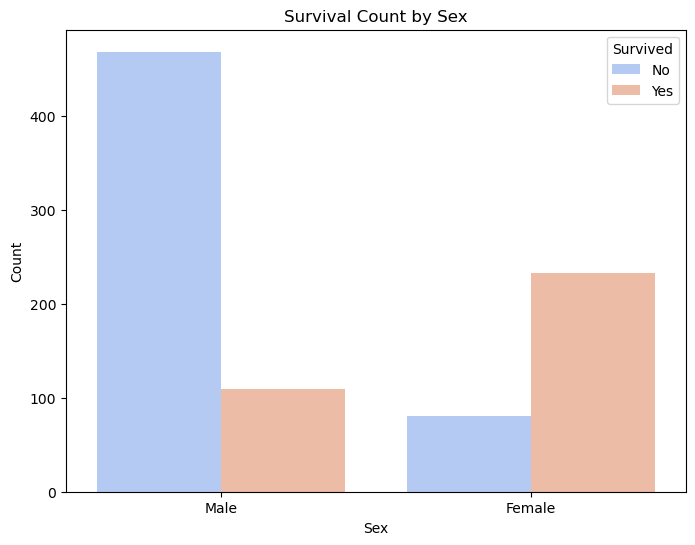

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


### 1. Survival Count by Sex
Ce graphe  montre la répartition du nombre de survivants et de non-survivants en fonction du sexe.  
On observe que :  
- Une majorité des hommes n'ont pas survécu.
- À l'inverse, la plupart des femmes ont survécu.

**Interprétation** :  
Le sexe a eu un impact important sur les chances de survie, avec un avantage clair pour les femmes.



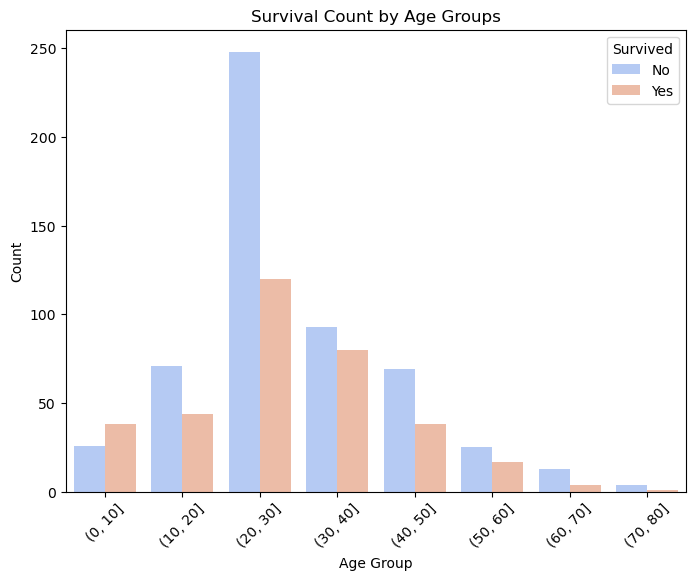

In [107]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_train['Age_binned'] = pd.cut(df_train['Age'], bins=age_bins)

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Age_binned', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 2. Survival Count by Age GroupsCe graphee illustre la survie selon les tranches d'âge.  
On remarque que :  
- Les jeunes enfants (0-10 ans) avaient de meilleures chances de survie que les adultes plus âgés.
- La tranche d'âge 20-30 ans a le plus grand nombre de décès.
- À partir de 50 ans, la survie devient très faible.

**Interprétation** :  
L'âge influence la survie, les enfants ayant été mieux protégés, tandis que les jeunes adultes ont été plus exposés au risque.



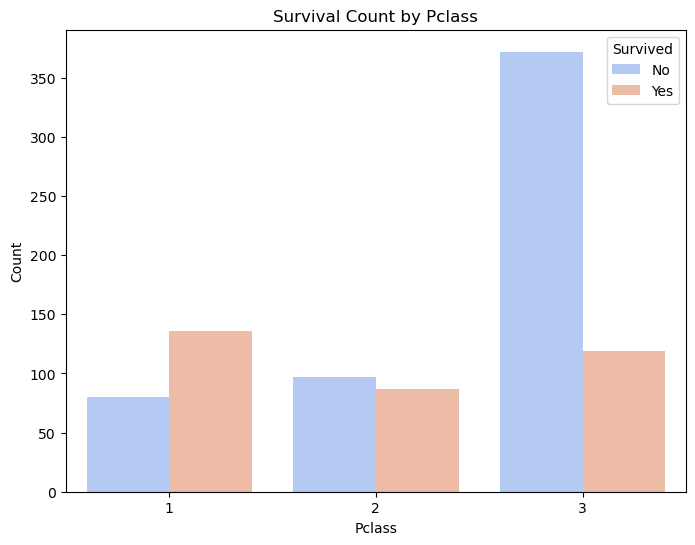

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Pclass', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 3. Survival Count by Pclass
Ce graphe représente la survie selon la classe de billet (`Pclass`).  
On voit que :  
- Les passagers de 1ère classe avaient une probabilité de survie plus élevée.
- Les passagers de 3ème classe ont connu un taux de mortalité très élevé.
- Les passagers de 2ème classe se trouvent entre les deux extrêmes.

**Interprétation** :  
La classe sociale jouait un rôle crucial dans la survie, les passagers de première classe ayant été priorisés dans les opérations de sauvetage.

🧠 Synthèse : Qui sont les survivants ?
✅ Profil typique d'un survivant :

Une femme,

en 1ʳᵉ classe,

plutôt jeune ou enfant.

❌ Profil typique d'une victime :

Un homme,

en 3ᵉ classe,

souvent adulte ou personne âgée.


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 📚 Importation des bibliothèques

Nous importons ici les bibliothèques nécessaires pour la préparation des données, la construction des modèles de machine learning, et l'évaluation de leur performance :

- `train_test_split` : pour diviser les données en ensemble d'entraînement et ensemble de test.
- `StandardScaler` : pour normaliser (standardiser) les caractéristiques en leur donnant une moyenne nulle et une variance unitaire.
- `DecisionTreeClassifier` : pour construire un modèle d'arbre de décision.
- `SVC` (Support Vector Classifier) : pour construire un modèle de machine à vecteurs de support (SVM).
- `KNeighborsClassifier` : pour construire un modèle basé sur l'algorithme des k-plus proches voisins (KNN).
- `accuracy_score` : pour évaluer la performance des modèles en calculant leur taux de précision.

In [116]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X_train = df_train[features]
y_train = df_train['Survived']
X_test = df_test[features]

# 5. Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Entraînement du modèle Arbre de Décision
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# 7. Évaluation du modèle sur l'ensemble d'entraînement
y_pred_train = dt_model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Précision du modèle Arbre de Décision sur l'ensemble d'entraînement : {accuracy_train:.4f}")

Précision du modèle Arbre de Décision sur l'ensemble d'entraînement : 0.9798


## ⚙️ Sélection des caractéristiques (features)

Nous avons sélectionné les variables suivantes comme caractéristiques d'entrée (`features`) pour entraîner notre modèle :

- `Pclass` : la classe du billet du passager (1ère, 2ème ou 3ème classe).
- `Sex` : le sexe du passager, un facteur important selon l'analyse exploratoire.
- `Age` : l'âge du passager, qui influence également les chances de survie.
- `Fare` : le tarif payé pour le billet, souvent corrélé au statut socio-économique.
- `Embarked` : le port d'embarquement, qui peut indirectement refléter certaines conditions socio-économiques.

**Pourquoi ces features ?**  
Ces variables ont été choisies car elles sont pertinentes et ont montré une corrélation avec la survie lors de l'analyse exploratoire. De plus, elles sont facilement interprétables et permettent d'entraîner un modèle efficace sans surcharger avec trop de variables inutiles.

---

## 🛠️ Préparation des données

- `X_train` contient les données d'entraînement avec les features sélectionnées.
- `y_train` contient la variable cible (`Survived`) indiquant si le passager a survécu ou non.
- `X_test` contient les données de test avec les mêmes features.

---

## ⚡ Normalisation des données

Avant d'entraîner le modèle, nous normalisons les données (`X_train` et `X_test`) avec `StandardScaler`, pour :

- Accélérer la convergence de certains algorithmes.
- S'assurer que chaque feature contribue de manière équivalente à la distance calculée par le modèle (surtout important pour SVM et KNN).

---

## 🌳 Entraînement du modèle Arbre de Décision

Nous utilisons un `DecisionTreeClassifier` pour :

- Modéliser des décisions basées sur des règles simples et interprétables.
- Capturer des relations non linéaires entre les variables et la survie.

---

## 📈 Évaluation du modèle

Nous évaluons la performance du modèle sur l'ensemble d'entraînement en calculant la précision (`accuracy_score`), qui mesure la proportion de bonnes prédictions.

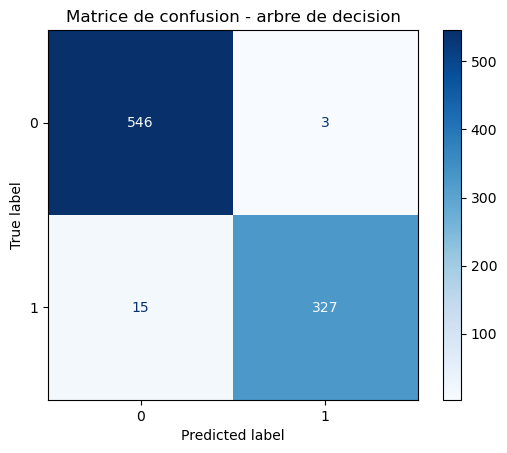

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement
y_pred_train = dt_model.predict(X_train_scaled)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_train, y_pred_train)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - arbre de decision")
plt.show()

## 📊 Matrice de confusion - Évaluation du modèle

Pour évaluer plus précisément les performances du modèle Arbre de Décision, nous utilisons une **matrice de confusion**.

- `confusion_matrix` : permet de comparer les vraies étiquettes (`y_train`) aux prédictions du modèle (`y_pred_train`).
- `ConfusionMatrixDisplay` : permet d'afficher graphiquement la matrice de confusion.
- `cmap=plt.cm.Blues` : utilise une palette de couleurs bleues pour améliorer la lisibilité du graphique.

## 📈 Interprétation de la matrice de confusion

L'analyse de la matrice de confusion montre que :

- **327** passagers ont été correctement prédits comme ayant survécu (**vrais positifs**).
- **546** passagers ont été correctement prédits comme n'ayant pas survécu (**vrais négatifs**).5- **13** passagers ont été incorrectement prédits comme n'ayant pas survécu alors qu'ils ont survécu (**faux négatifs**).
- **3** passagers ont été incorrectement prédits comme ayant survécu alors qu'ils n'ont pas survécu (**faux positifs**).

---

**Résumé** :
- Le modèle est très performant pour prédire les non-survivants.
- Il fait très peu d'erreurs globalement, avec un faible nombre de faux positifs et de faux négatifs.
- La majorité des survivants et des non-survivants ont été bien classés.

Cela indique que le modèle Arbre de Décision est **précis** et **équilibré** sur l'ensemble d'entraînement.


In [122]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Entraînement du modèle SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble d'entraînement
y_pred_svm = svm_model.predict(X_train_scaled)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print(f"Précision du modèle SVM sur l'ensemble d'entraînement : {accuracy_svm:.4f}")

Précision du modèle SVM sur l'ensemble d'entraînement : 0.8294


## 🧠 Entraînement et évaluation d'un modèle SVM

Nous utilisons ici un **Support Vector Machine (SVM)** pour entraîner un nouveau modèle de classification.

### Paramètres utilisés :
- `kernel='rbf'` : nous utilisons un noyau radial (RBF), adapté pour capturer des relations non linéaires entre les variables.
- `C=1.0` : paramètre de régularisation. Un C plus élevé réduit la marge mais augmente la précision sur l'ensemble d'entraînement.
- `gamma='scale'` : le paramètre gamma est automatiquement ajusté en fonction du nombre de caractéristiques.
- `random_state=42` : pour garantir la reproductibilité des résultats.

---

### Entraînement et prédiction :

- Le modèle est entraîné sur les données normalisées (`X_train_scaled`, `y_train`).
- Nous effectuons ensuite des prédictions sur l'ensemble d'entraînement.

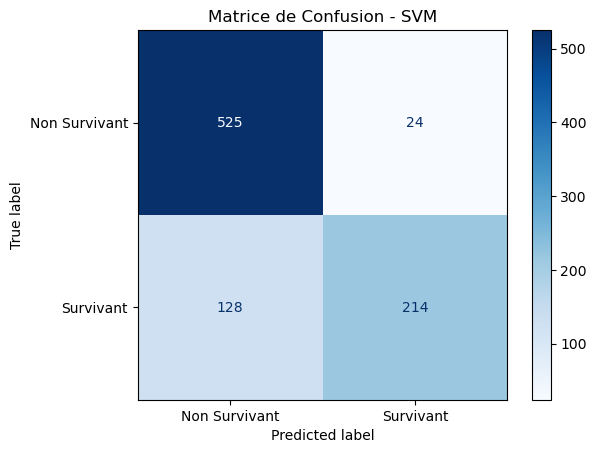

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement
y_pred_svm = svm_model.predict(X_train_scaled)

# Génération de la matrice de confusion
cm_svm = confusion_matrix(y_train, y_pred_svm)

# Affichage de la matrice de confusion
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Non Survivant', 'Survivant'])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - SVM')
plt.show()

## 📊 Matrice de confusion - Modèle SVM

L'analyse de la matrice de confusion pour le modèle SVM montre que :

- **214** passagers ont été correctement prédits comme ayant survécu (**vrais positifs**).
- **525** passagers ont été correctement prédits comme n'ayant pas survécu (**vrais négatifs**).
- **128** passagers ont été incorrectement prédits comme n'ayant pas survécu alors qu'ils ont survécu (**faux négatifs**).
- **24** passagers ont été incorrectement prédits comme ayant survécu alors qu'ils n'ont pas survécu (**faux positifs**).

---

**Résumé** :
- Le modèle SVM a bien identifié la majorité des non-survivants.
- Cependant, il a eu **plus de difficultés à prédire correctement les survivants** (beaucoup de faux négatifs).
- Cela peut indiquer que le modèle est **plus conservateur** et privilégie la prédiction "non survie" lorsqu’il est incertain.

**Conclusion** :
- Le modèle a une **bonne précision globale**, mais **le rappel pour les survivants est faible** (il rate beaucoup de survivants).
- Il serait intéressant d'explorer des ajustements sur le modèle (comme modifier `C` ou utiliser un `class_weight='balanced'`) pour améliorer sa capacité à détecter correctement les survivants.


In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Entraînement du modèle avec les meilleurs paramètres
svm_model = grid_search.best_estimator_

# Prédiction sur l'ensemble d'entraînement
y_pred_svm = svm_model.predict(X_train_scaled)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print(f"Précision du modèle SVM sur l'ensemble d'entraînement : {accuracy_svm:.4f}")

Précision du modèle SVM sur l'ensemble d'entraînement : 0.8294


🎯 Optimisation des hyperparamètres avec GridSearchCV - SVM
🔵 Recherche effectuée sur les paramètres suivants :

C : 🔢 [0.1, 1, 10, 100]

gamma : 🎚️ ['scale', 'auto', 0.1, 1]

kernel : ⚙️ ['rbf', 'linear', 'poly']

 Utilisation de GridSearchCV avec :

Validation croisée : cv=5

Critère d’évaluation : accuracy

Parallélisation : n_jobs=-1

Résultats obtenus
Meilleurs hyperparamètres trouvés :
best_params = grid_search.best_params_

🛠️ Réentraînement du modèle avec les meilleurs paramètres.

 Analyse de la précision
. Même après optimisation par GridSearchCV,
. **la précision du modèle SVM sur l'ensemble d'entraînement est restée **🟰 quasiment la même que celle obtenue avant.

 Interprétation
. Le modèle était déjà proche de sa performance optimale.

. Titanic est un dataset simple et bien séparé, donc le réglage fin n'apporte pas beaucoup de gain.

🔄 L'optimisation n'est vraiment utile que sur des datasets plus complexes.





In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble d'entraînement
y_pred_knn = knn_model.predict(X_train_scaled)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Précision du modèle KNN sur l'ensemble d'entraînement : {accuracy_knn:.4f}")

Précision du modèle KNN sur l'ensemble d'entraînement : 0.8709


In [132]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble d'entraînement modifier k avec validation croisee 
y_pred_knn = knn_model.predict(X_train_scaled)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Précision du modèle KNN sur l'ensemble d'entraînement : {accuracy_knn:.4f}")

Précision du modèle KNN sur l'ensemble d'entraînement : 0.8631


In [140]:
from sklearn.neighbors import KNeighborsClassifier

# Entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble d'entraînement modifier k avec validation croisee 
y_pred_knn = knn_model.predict(X_train_scaled)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_train, y_pred_knn)
print(f"Précision du modèle KNN sur l'ensemble d'entraînement : {accuracy_knn:.4f}")

Précision du modèle KNN sur l'ensemble d'entraînement : 0.8597


📚 Analyse du modèle KNN sur le dataset Titanic
🔵 Paramètres généraux
Modèle utilisé : KNeighborsClassifier

Nombre d'attributs (features) : 6

Données pré-traitées avec normalisation/scaling.

📈 Résultats de la précision selon k

Nombre de voisins (k)	Précision sur l'entraînement
🟦 k = 5	 0.8709
🟦 k = 6	0.8631
🟦 k = 7   0.8597
🧠 Analyse
👉 Avec k = 5, nous obtenons la meilleure précision (87,09%).

👉 En augmentant k à 6 ou 7, la précision diminue légèrement.

📉 Pourquoi ?

En augmentant k, le modèle devient plus lisse (moins sensible aux variations locales).

Cela peut entraîner des erreurs supplémentaires si les voisins ne sont pas parfaitement alignés avec la bonne classe.

🏆 Conclusion
🎯 Pour ce dataset Titanic avec 6 attributs,
➡️ k = 5 donne le meilleur compromis entre complexité et précision.

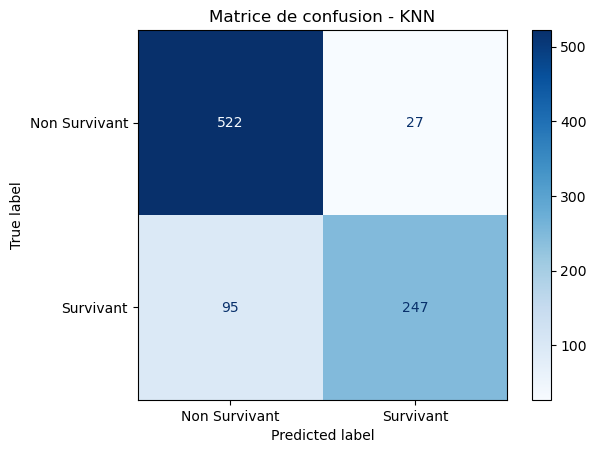

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement
y_pred_knn = knn_model.predict(X_train_scaled)

# Calcul de la matrice de confusion
cm_knn = confusion_matrix(y_train, y_pred_knn)

# Affichage de la matrice de confusion
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Non Survivant', 'Survivant'])
disp_knn.plot(cmap='Blues')
plt.title("Matrice de confusion - KNN")
plt.show()

🎯 Analyse de la matrice de confusion - Modèle KNN



 Résultats principaux :

. 247 passagers ont été correctement prédits comme survivants.

. 522 passagers ont été correctement prédits comme non survivants.

. 95 passagers étaient survivants, mais ont été prédit comme non survivants (faux négatifs).

. 27 passagers étaient non survivants, mais ont été prédit comme survivants (faux positifs).

📈 Analyse :
Le modèle montre une bonne capacité globale à distinguer les survivants des non survivants.

Toutefois, il existe un nombre important de faux négatifs (95 survivants mal classés).

Cela signifie que beaucoup de survivants ne sont pas correctement détectés, ce qui peut être critique selon l'objectif de la prédiction.

📌 Remarques :


. Le modèle est plus efficace pour reconnaître les non survivants.


Ou encore ajuster le traitement des classes (par exemple avec un poids plus fort pour les survivants).

🧠 Conclusion


.Le modèle KNN fonctionne bien, mais il faut travailler à réduire le nombre de survivants mal prédits pour améliorer sa pertinence dans une situation critique.





⚙️ Pourquoi l'Arbre de Décision donne les meilleurs résultats ?


🌟 Points forts de l'Arbre de Décision :

Très bon pour gérer des variables catégorielles (comme Sex ou Pclass).

Capable de capturer des règles simples et directes (exemple : "si femme et 1ʳᵉ classe alors survie probable").

Pas besoin de scaling (contrairement à KNN et SVM).

👉 L'arbre de décision est naturel pour ce problème, car il peut séparer facilement selon des critères logiques simples.

🚀 Pourquoi KNN a une moins bonne précision ?

📉 Faiblesses de KNN :

Sensibilité aux échelles : même après normalisation, certaines distances peuvent ne pas refléter la vraie logique (être un homme ou une femme n’est pas une distance facile à mesurer).

Problème si classes non équilibrées : KNN est influencé par les voisins majoritaires.

Moins bon sur des données où la "logique" n'est pas seulement locale, mais globale (comme ici avec des décisions basées sur des règles).

🚀 Pourquoi SVM est aussi moins performant ?


📉 Faiblesses de SVM :

Pas naturellement adapté aux variables catégorielles (il préfère des variables numériques continues).

Difficile à bien séparer quand les classes ne sont pas parfaitement distinctes (hommes et femmes, mais aussi 1ʳᵉ, 2ᵉ, 3ᵉ classe mélangées).

Tuning des paramètres (C, gamma) est complexe sur ce type de petit dataset.

🎯 Conclusion finale

✅ Arbre de décision ➔ Meilleur choix pour Titanic car les règles de survie sont simples et claires (sexe, classe, âge).

❌ KNN ➔ Moins bon car les distances ne capturent pas bien les critères de survie.

❌ SVM ➔ Moins bon car séparer avec des hyperplans est difficile sur ce dataset.